# Steps

1. Import libraries
2. Import the dataset
3. Perform Data Analysis & EDA
4. Spliting the data
5. [Optional] Data Preprocessing - Feature Scaling,...
6. Choosing a model - Decision Tree Regressor
7. Training the model
8. Testing the model
9. Checking the performance of the model

In [1]:
# Data cleaning 
# Data manipulation
# Data exploration
# Data visualization

SyntaxError: invalid syntax (<ipython-input-1-fe700bfeaf50>, line 1)

In [5]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# problem statement

# Importing the dataset

link: https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv")

# Data Analysis & EDA

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [9]:
df.ndim   #<- It shows the dimension of the datasets

2

In [10]:
df.shape

(4340, 8)

In [11]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [12]:
df.describe()   #<- this describe function gives statastical data of dataset

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [13]:
df.info()   #<- It gives how many null values are inside the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [15]:
df.fuel.unique()   #<- It shows the unique values in fuel column

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [16]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [17]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [18]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [19]:
#As we know that fuel type impacts on the pricing of the car but here we are doing regrssion machine learnig, so it will not take this string values in consideration. It takes only numerical values

In [20]:
# Create a column new_fuel and place it at index of the fuel column
# Replace the values:
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4

In [21]:
y = df.fuel.replace(["Petrol","Diesel","CNG","LPG","Electric"],[0,1,2,3,4])
df.insert(4,"new_fuel",y)

In [22]:
df

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Diesel,Individual,Manual,First Owner


In [23]:
# Create a column new_seller_type and place it at index of the seller_type column
# Replace the values:
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2
x = df.seller_type.replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
df.insert(df.columns.get_loc("seller_type"),"new_seller_type",x)

# df.columns.get_loc("new_seller_type")  <- This will gives the index number of column name fuel

In [24]:
df

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Diesel,0,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Diesel,0,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Petrol,0,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Diesel,0,Individual,Manual,First Owner


In [25]:
df.new_seller_type.unique()

array([0, 1, 2], dtype=int64)

In [74]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv")

In [76]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
from sklearn.preprocessing import LabelEncoder  #<- This label encoder will be give different numerical value to the different categorical datas

In [78]:
df['fuel']=LabelEncoder().fit_transform(df["fuel"])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [93]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0


In [94]:
# Create a column no_of_years = curent_year - year
df["current_year"]=2021

In [95]:
df["no_of_years"] = df["current_year"]-df["year"]

In [96]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2021,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2021,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2021,9
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2021,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2021,7
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2,2021,7
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2,2021,7
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2,2021,12
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0,2021,5


In [ ]:
# OR YOU CAN USE THE BELOW METHOD ALSO

In [97]:
# no_of_years=[]
# for i in df.year:
#     j=2021-i
#     no_of_years.append(j)

In [84]:
# df.insert(df.columns.get_loc("fuel"),"no_of_years",no_of_years)

In [98]:
# Drop columns = name,year,current_year
# Rename selling_price to current_selling_price
df.drop(["name","year","current_year"],inplace=True,axis=1)

In [100]:
df.rename(columns={"selling_price":"current_selling_price"},inplace=True)

In [101]:
df

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,14
1,135000,50000,4,1,1,0,14
2,600000,100000,1,1,1,0,9
3,250000,46000,4,1,1,0,4
4,450000,141000,1,1,1,2,7
...,...,...,...,...,...,...,...
4335,409999,80000,1,1,1,2,7
4336,409999,80000,1,1,1,2,7
4337,110000,83000,4,1,1,2,12
4338,865000,90000,1,1,1,0,5


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int32
 3   seller_type            4340 non-null   int32
 4   transmission           4340 non-null   int32
 5   owner                  4340 non-null   int32
 6   no_of_years            4340 non-null   int64
dtypes: int32(4), int64(3)
memory usage: 169.7 KB


In [103]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


<AxesSubplot:>

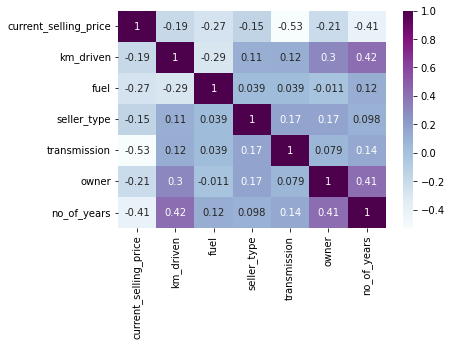

In [106]:
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

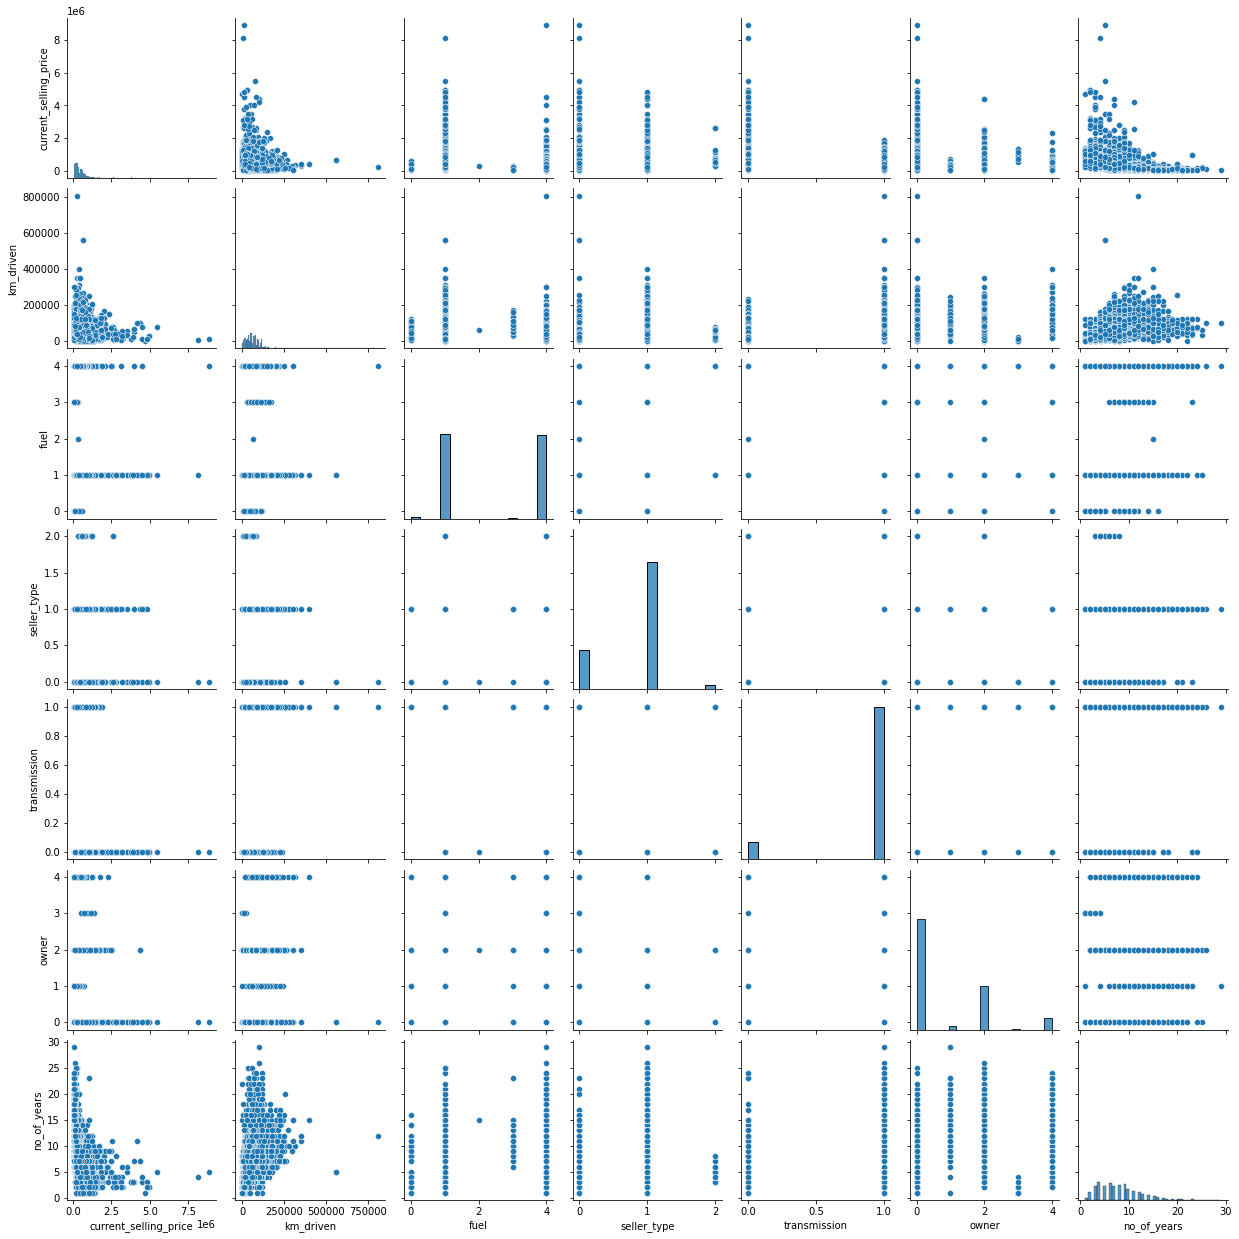

In [107]:
sns.pairplot(df)

<AxesSubplot:>

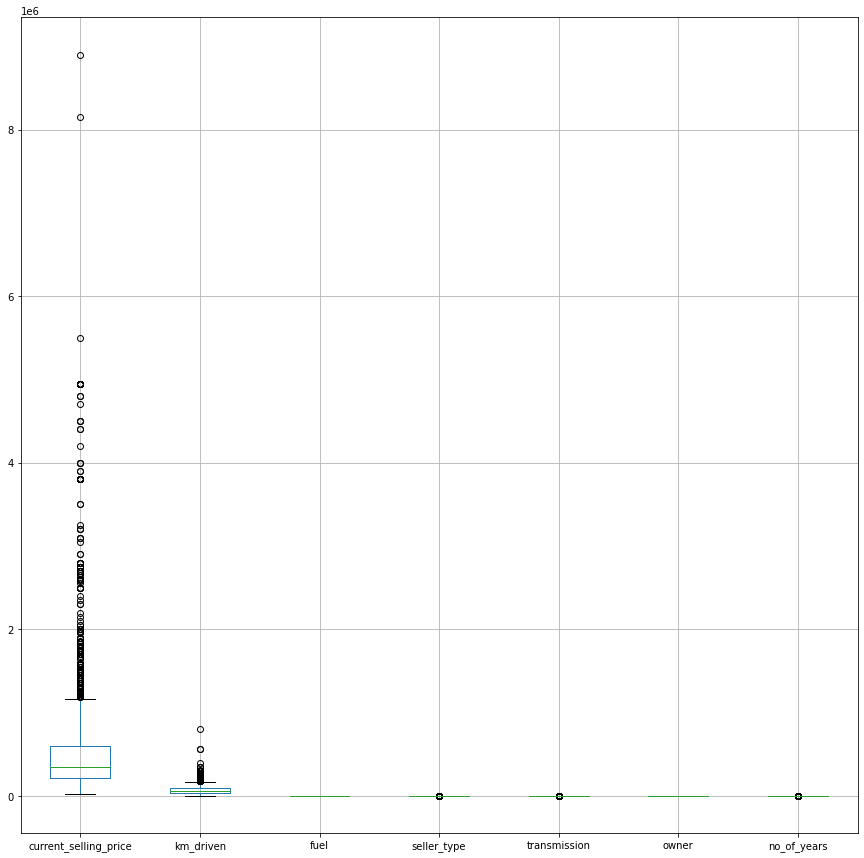

In [110]:
plt.figure(figsize=(15,15))
df.boxplot()

# Select the features and targets

In [111]:
df.head(1)

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,14


In [112]:
x= np.array(df.drop(["current_selling_price"],axis=1))
y=np.array(df.current_selling_price)

In [113]:
x

array([[ 70000,      4,      1,      1,      0,     14],
       [ 50000,      4,      1,      1,      0,     14],
       [100000,      1,      1,      1,      0,      9],
       ...,
       [ 83000,      4,      1,      1,      2,     12],
       [ 90000,      1,      1,      1,      0,      5],
       [ 40000,      4,      1,      1,      0,      5]], dtype=int64)

In [114]:
y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000], dtype=int64)

# Spliting the data

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [116]:
len(x_train)

3472

In [117]:
len(y_train)

3472

# Choosing the model

In [118]:
regressor = DecisionTreeRegressor()

In [119]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

# Testing the model

In [124]:
y_pred=regressor.predict(x_test)

In [125]:
target = pd.DataFrame({"Actual": y_test , "predicted":y_pred})

In [127]:
target.head()

,Actual,predicted
0,300000,92000.0
1,800000,380000.0
2,360000,640000.0
3,825000,825000.0
4,1050000,578750.0


Text(0.5, 1.0, 'Actual V/s Predicted')

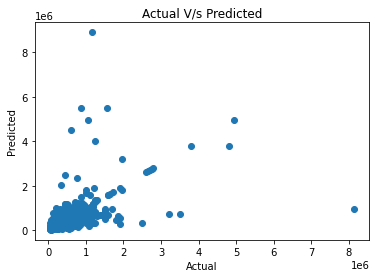

In [128]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual V/s Predicted")

# Study the reshape concept and construct a scatter plot that shows the actual and predicted values w.r.t X_test

ValueError: x and y must be the same size

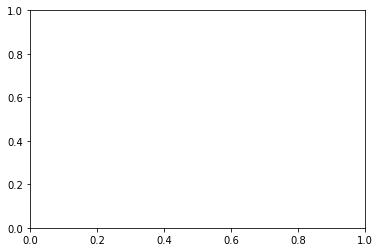

In [136]:
plt.scatter(x_test,y_test,color="red")
plt.scatter(x_test,y_pred,color="green")

<AxesSubplot:>

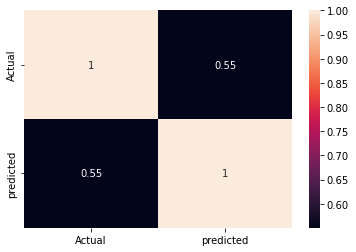

In [139]:
sns.heatmap(target.corr(),annot=True)

# Performance metrics

In [141]:
r2_score(y_test,y_pred)

-0.0566996066854093

In [142]:
mean_absolute_error(y_test,y_pred)

197012.4136934654

In [143]:
mean_squared_error(y_test,y_pred)

304679281778.32587

In [146]:
regressor.score(x_test,y_test)

-0.0566996066854093

In [148]:
np.linspace(1,10,5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [37]:
new_df = df.copy()

In [38]:
new_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'new_fuel', 'fuel',
       'new_seller_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [39]:
new_df = new_df[["fuel","seller_type"]]  #<- When you want to delete all the columns except only these 2 columns, then use this method

In [40]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [41]:
type(new_df)

pandas.core.frame.DataFrame

# Convert caterogical data into numerical separate different column directly
We use pandas library's for get_dummies function for convert the categorical data into numercial data

In [42]:
new_df=pd.get_dummies(new_df)  #<- This is the inbuilt function of encoder which separate all the fuel and seller_type data into new columns

In [43]:
new_df

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4335,0,1,0,0,0,0,1,0
4336,0,1,0,0,0,0,1,0
4337,0,0,0,0,1,0,1,0
4338,0,1,0,0,0,0,1,0


# Label Encoder 
label encoder is used to separate the column categorical values into numerical form

In [44]:
new_df1=df.copy()

In [47]:
new_df1.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [45]:
from sklearn.preprocessing import LabelEncoder

In [52]:
new_df1["fuel"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [54]:
new_df1["fuel"] = LabelEncoder().fit_transform(new_df1["fuel"])  #<- This will give numeric values to all same categorical values into the column

In [55]:
new_df1.fuel.unique()   

array([4, 1, 0, 3, 2])

In [56]:
new_df1.fuel

0       4
1       4
2       1
3       4
4       1
       ..
4335    1
4336    1
4337    4
4338    1
4339    4
Name: fuel, Length: 4340, dtype: int32

# One Hot Encoder  
one Hot Encoder will convert the one column of different categorical values into different columns 

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [69]:
new_df2=df.copy()

In [70]:
enc = OneHotEncoder().fit(new_df2)

In [71]:
enc_df = pd.DataFrame(enc.fit_transform(new_df2[['seller_type']]).toarray())

In [72]:
enc_df

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4335,0.0,1.0,0.0
4336,0.0,1.0,0.0
4337,0.0,1.0,0.0
4338,0.0,1.0,0.0
